In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [6]:
df.to_csv("C:/Users/DANISH/Desktop/data/BA_reviews.csv")

In [8]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/DANISH/Desktop/data/BA_reviews.csv'  # Replace with your dataset's file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Original Dataset:")
print(df.head())



Original Dataset:
   Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |   On a recent flight from Cy...
1           1  ✅ Trip Verified |   Flight BA 0560 arrived in ...
2           2  ✅ Trip Verified |   This was the first time I ...
3           3  ✅ Trip Verified |   Pretty good flight but sti...
4           4  ✅ Trip Verified | Check in was fine, but no pr...


In [11]:
# Define the cleaning function
def clean_review(text):
    if isinstance(text, str):  # Ensure the input is a string
        return text.replace("✅ Trip Verified", "").strip()  # Remove unwanted text
    return text

# Apply the cleaning function to the column containing reviews
# Replace 'review_column' with the actual column name containing reviews
df['reviews'] = df['reviews'].apply(clean_review)

# Save the cleaned dataset to a new file
cleaned_file_path = 'cleaned_reviews.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}.")

Cleaned dataset saved to cleaned_reviews.csv.


In [13]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/626.3 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 419.8/626.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
from textblob import TextBlob

# Function to calculate sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

# Apply sentiment analysis to the reviews
df['Sentiment'] = df['reviews'].apply(analyze_sentiment)

# Summary of sentiment counts
sentiment_summary = df['Sentiment'].value_counts()
print(sentiment_summary)

# Save sentiment analysis results
df.to_csv('reviews_with_sentiments.csv', index=False)


Sentiment
Positive    617
Negative    371
Neutral      12
Name: count, dtype: int64


In [28]:
from collections import Counter

# Combine all reviews into a single text
all_reviews = " ".join(df['reviews'])

# Tokenize and count word frequencies
word_list = all_reviews.split()
word_counts = Counter(word_list)

# Get the most common words
most_common_words = word_counts.most_common(50)
print(most_common_words)


[('the', 6401), ('to', 5551), ('and', 4578), ('was', 3237), ('a', 3206), ('I', 3122), ('of', 2102), ('in', 1976), ('for', 1731), ('on', 1661), ('flight', 1457), ('with', 1378), ('that', 1259), ('my', 1221), ('not', 1150), ('is', 1131), ('BA', 1104), ('were', 1102), ('The', 1084), ('at', 1056), ('we', 1009), ('|', 999), ('had', 986), ('they', 944), ('have', 889), ('but', 867), ('it', 866), ('from', 739), ('as', 734), ('no', 719), ('this', 697), ('me', 597), ('an', 583), ('our', 582), ('be', 574), ('service', 517), ('very', 513), ('so', 505), ('are', 504), ('you', 495), ('British', 447), ('their', 415), ('We', 414), ('which', 405), ('by', 403), ('-', 399), ('would', 390), ('get', 383), ('or', 380), ('time', 380)]


In [ ]:
pip install wordcloud

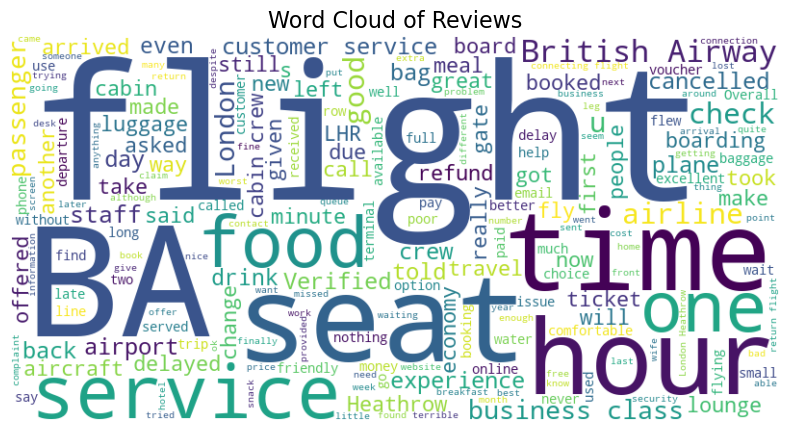

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Reviews", fontsize=16)
plt.show()


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text into a document-term matrix
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['reviews'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# Display topics
for index, topic in enumerate(lda.components_):
    print(f"Topic #{index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic #1:
['london', 'said', 'bag', 'did', 'service', 'told', 'customer', 'luggage', 'flight', 'ba']
Topic #2:
['london', 'told', 'airport', 'hours', 'time', 'staff', 'ba', 'minutes', 'check', 'flight']
Topic #3:
['really', 'fly', 'crew', 'flights', 'hours', 'service', 'staff', 'time', 'flight', 'ba']
Topic #4:
['london', 'airline', 'booked', 'cancelled', 'customer', 'service', 'airways', 'british', 'ba', 'flight']
Topic #5:
['business', 'cabin', 'service', 'seat', 'class', 'crew', 'food', 'good', 'ba', 'flight']


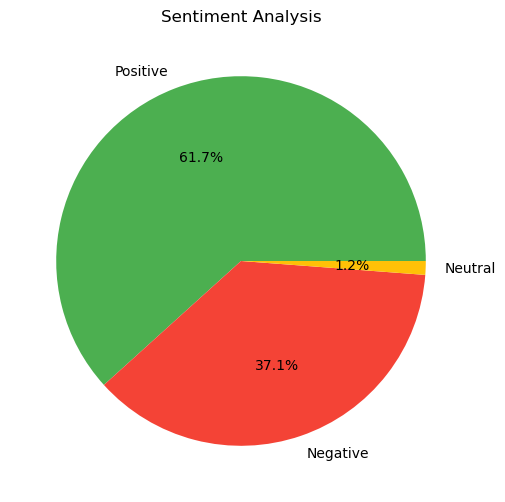

In [30]:
import matplotlib.pyplot as plt

# Data
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [617, 371, 12]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=sentiments, autopct='%1.1f%%', colors=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Analysis')
plt.show()


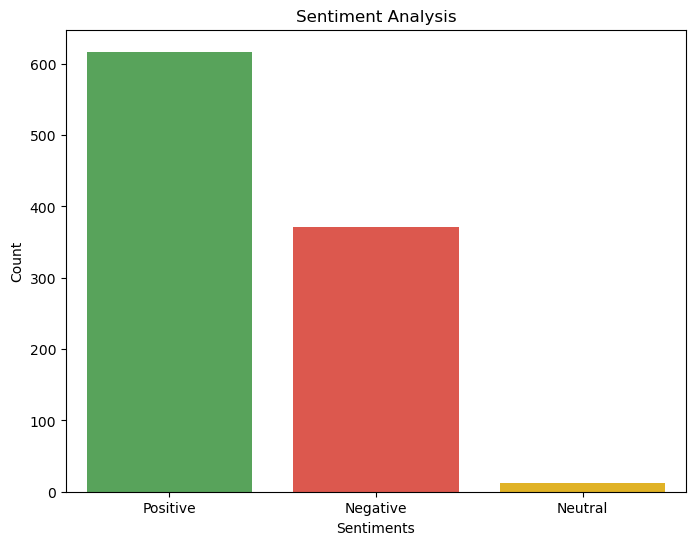

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
import pandas as pd
data = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Count': [617, 371, 12]
})

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Count', data=data, palette=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()


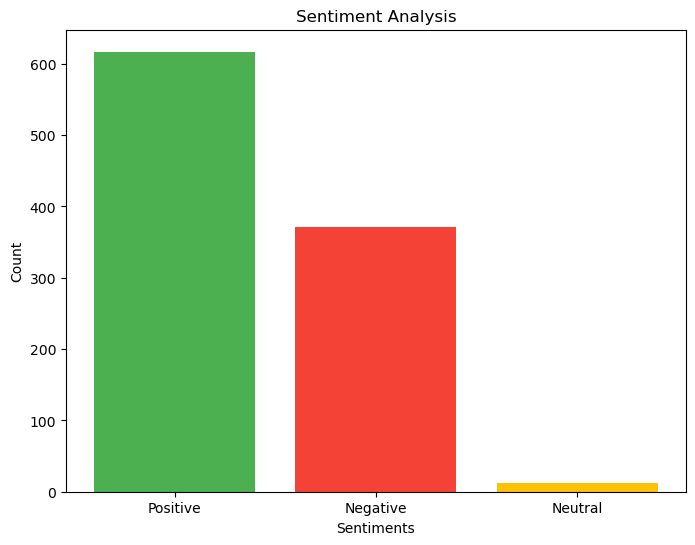

In [32]:
import matplotlib.pyplot as plt

# Data
sentiments = ['Positive', 'Negative', 'Neutral']
counts = [617, 371, 12]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(sentiments, counts, color=['#4CAF50', '#F44336', '#FFC107'])
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()